In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

In [2]:
# Convert yes/no columns to 1/0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert furnishingstatus to numerical (one-hot encoding would be better but keeping it simple)
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Simple linear Regression



Simple Linear Regression (Area vs Price) Results:
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.2729


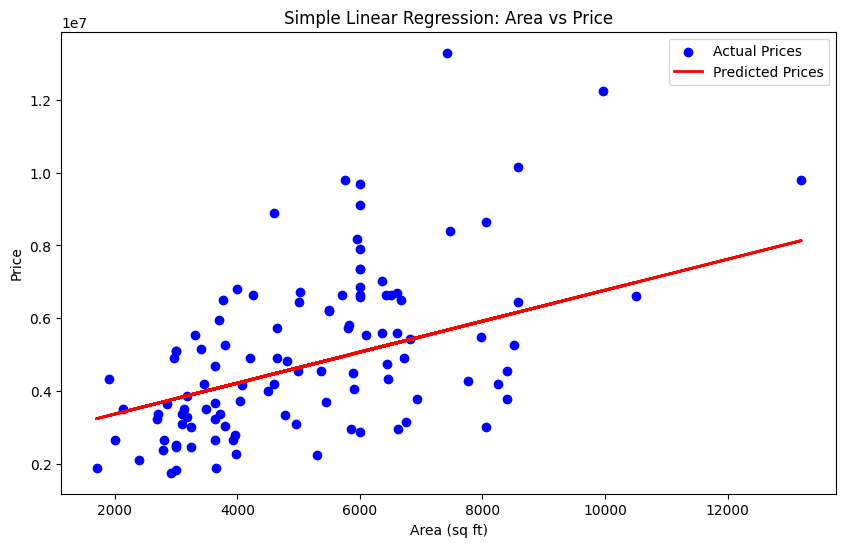


Coefficient for area: 425.73
Interpretation: For each additional square foot of area, the price increases by 425.72984193878284 units.


In [3]:
# Split data into features (X) and target (y)
X_simple = df[['area']]
y = df['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Create and fit the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Make predictions
y_pred_simple = simple_model.predict(X_test)

# Evaluate the model
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression (Area vs Price) Results:")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.4f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Predicted Prices')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Interpret the coefficient
print(f"\nCoefficient for area: {simple_model.coef_[0]:.2f}")
print("Interpretation: For each additional square foot of area, the price increases by", simple_model.coef_[0], "units.")

Multiple linear Regression


Multiple Linear Regression Results:
MAE: 979679.69
MSE: 1771751116594.04
R²: 0.6495


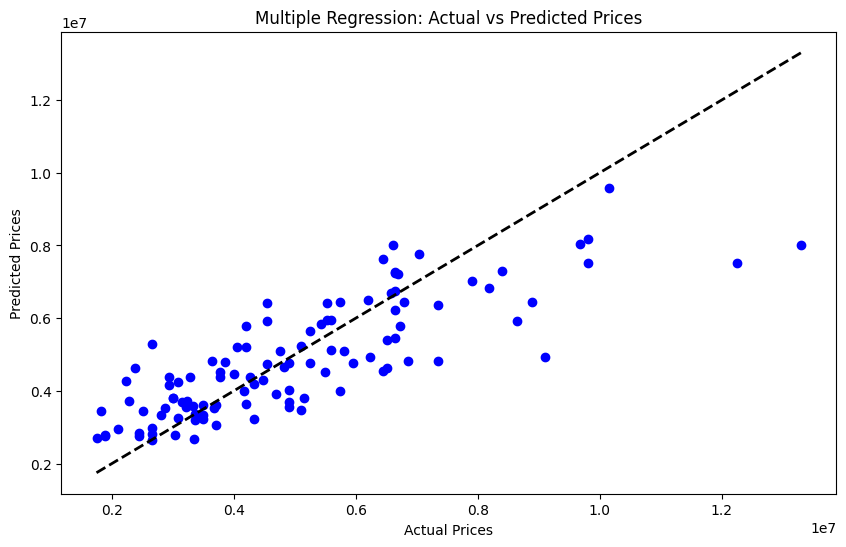


Feature Coefficients:
             Feature   Coefficient
2          bathrooms  1.097117e+06
8    airconditioning  7.855506e+05
7    hotwaterheating  6.878813e+05
10          prefarea  6.299017e+05
3            stories  4.062232e+05
6           basement  3.931598e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
9            parking  2.257565e+05
11  furnishingstatus  2.103971e+05
1           bedrooms  7.857449e+04
0               area  2.358488e+02


In [4]:
# Prepare features for multiple regression
X_multiple = df.drop('price', axis=1)

# Split into train and test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42)

# Create and fit the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\nMultiple Linear Regression Results:")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"R²: {r2_multi:.4f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, color='blue')
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()], 'k--', lw=2)
plt.title('Multiple Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': X_multiple.columns,
    'Coefficient': multi_model.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))